In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
os.listdir()

['2025.08_LS_Quant_1', 'crude.ipynb', 'data', 'test1.ipynb', 'vkospi관련.ipynb']

In [128]:
os.getcwd()

'c:\\Users\\tmdal\\ls_quant1\\week3'

In [129]:
dir = os.getcwd()

In [130]:
crude = pd.read_csv(dir+'/data/crude.csv')

In [131]:
crude

,통계표,계정항목,단위,변환,2003/01,2003/02,2003/03,2003/04,2003/05,2003/06,...,2024/09,2024/10,2024/11,2024/12,2025/01,2025/02,2025/03,2025/04,2025/05,2025/06
0,8.4.11. 석유제품수급,생산,천배럴,원자료,"78,826","71,319","74,847","67,194","67,680","67,214",...,"105,442","105,598","102,764","105,207","108,030","96,276","99,328","105,171","107,123","103,019"
1,8.4.11. 석유제품수급,국내소비,천배럴,원자료,"75,356","65,646","65,378","56,246","59,662","60,051",...,"78,872","84,366","77,292","81,877","78,812","72,561","78,010","77,108","75,022","76,746"
2,8.4.11. 석유제품수급,수입,천배럴,원자료,"98,130","82,302","96,696","83,607","77,976","65,861",...,"112,449","118,924","115,227","114,356","125,903","109,355","109,399","110,308","125,379","113,295"
3,8.4.11. 석유제품수급,수출,천배럴,원자료,"17,083","18,819","21,014","19,597","16,613","16,608",...,"43,922","38,744","41,422","42,066","37,289","39,930","38,423","40,505","45,111","43,403"


In [132]:
crude.columns

Index(['통계표', '계정항목', '단위', '변환', '2003/01', '2003/02', '2003/03', '2003/04',
       '2003/05', '2003/06',
       ...
       '2024/09', '2024/10', '2024/11', '2024/12', '2025/01', '2025/02',
       '2025/03', '2025/04', '2025/05', '2025/06'],
      dtype='object', length=274)

In [133]:
drops = ['통계표', '계정항목', '단위', '변환']
crude.drop(columns=drops, inplace=True)


In [134]:
crude = crude.T

In [135]:
crude.columns = ['생산', '국내소비', '수입', '수출']

In [136]:
crude.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 2003/01 to 2025/06
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   생산      270 non-null    object
 1   국내소비    270 non-null    object
 2   수입      270 non-null    object
 3   수출      270 non-null    object
dtypes: object(4)
memory usage: 10.5+ KB


In [137]:
for a in crude.columns:
    crude[a] = crude[a].str.replace(',', '')
    crude[a] = crude[a].astype('float')


In [138]:
crude['수입 중 생산 비중'] = crude['생산'].div(crude['수입'])

<Axes: >

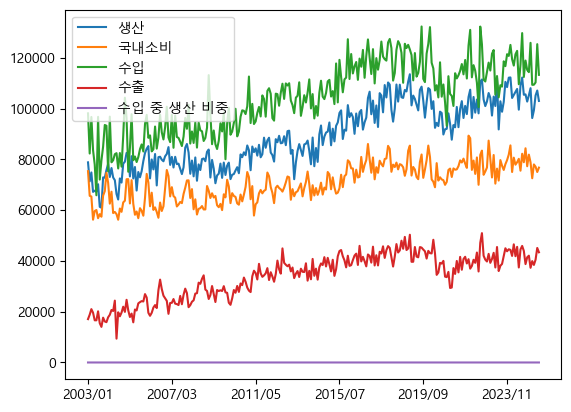

In [139]:
plt.rcParams['font.family'] = 'Malgun Gothic'
crude.plot(
    
)

<Axes: >

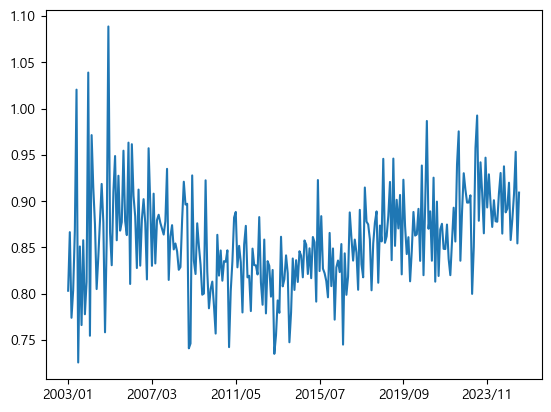

In [140]:
crude['수입 중 생산 비중'].plot()

In [141]:
energy = pd.read_csv(dir+'/data/energy.csv')

In [142]:
energy.columns

Index(['통계표', '계정항목', '단위', '변환', '2003/01', '2003/02', '2003/03', '2003/04',
       '2003/05', '2003/06',
       ...
       '2024/07', '2024/08', '2024/09', '2024/10', '2024/11', '2024/12',
       '2025/01', '2025/02', '2025/03', '2025/04'],
      dtype='object', length=272)

In [143]:
drops = ['통계표', '계정항목', '단위', '변환']
energy.drop(columns=drops, inplace=True)

In [144]:
energy = energy.T

In [145]:
energy.columns = ['합계', '석탄', '가스', '석유', '원자력', '수력', '바이오및폐기물', '지열태양열및 기타', '열']

In [146]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 2003/01 to 2025/04
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   합계         268 non-null    object
 1   석탄         268 non-null    object
 2   가스         268 non-null    object
 3   석유         268 non-null    object
 4   원자력        268 non-null    object
 5   수력         268 non-null    object
 6   바이오및폐기물    268 non-null    object
 7   지열태양열및 기타  268 non-null    object
 8   열          268 non-null    object
dtypes: object(9)
memory usage: 20.9+ KB


In [147]:
for a in energy.columns:
    energy[a] = energy[a].str.replace(',', '')
    energy[a] = energy[a].astype('float')


In [148]:
energy['석유비율'] = energy['석유'].div(energy['합계'])

<Axes: >

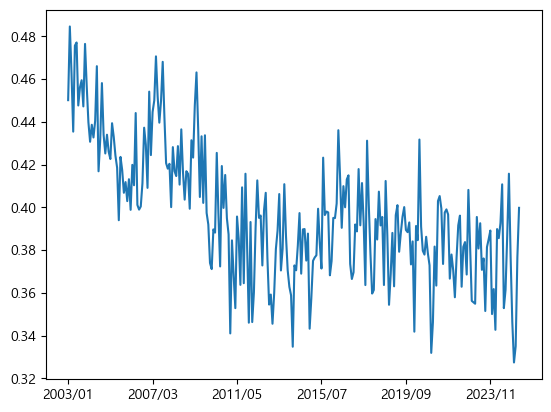

In [149]:
energy['석유비율'].plot()

In [172]:
energy.tail(5)

,합계,석탄,가스,석유,원자력,수력,바이오및폐기물,지열태양열및 기타,열,석유비율
2024-12-01,28255.0,6580.0,6802.0,9789.0,3560.0,45.0,798.0,674.0,6.0,0.346452
2025-01-01,27682.0,6211.0,7096.0,9065.0,3811.0,47.0,782.0,661.0,8.0,0.327469
2025-02-01,25653.0,4938.0,7116.0,8596.0,3457.0,41.0,731.0,770.0,5.0,0.335088
2025-03-01,24450.0,4383.0,5396.0,9206.0,3806.0,43.0,753.0,857.0,6.0,0.376524
2025-04-01,23064.0,3957.0,4682.0,9221.0,3393.0,53.0,757.0,995.0,6.0,0.399801


In [152]:
energy.index = pd.to_datetime(energy.index)

C:\Users\tmdal\AppData\Local\Temp\ipykernel_6984\2871981767.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  energy.index = pd.to_datetime(energy.index)


In [158]:
energy_5y = energy.resample('Y').mean()

C:\Users\tmdal\AppData\Local\Temp\ipykernel_6984\705010785.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  energy_5y = energy.resample('Y').mean()


In [167]:
energy_5y.index.year

Index([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025],
      dtype='int32')

In [170]:
energy_5y.columns

Index(['합계', '석탄', '가스', '석유', '원자력', '수력', '바이오및폐기물', '지열태양열및 기타', '열',
       '석유비율'],
      dtype='object')

<Axes: >

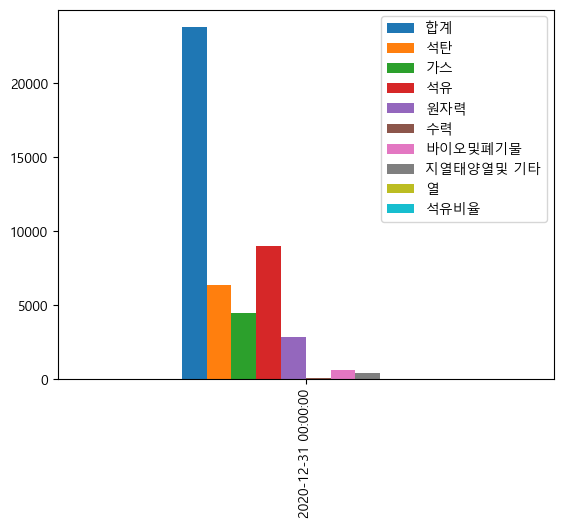

In [ ]:
years = range(2020, 2025)
cols = ['석탄', '가스', '석유', '원자력', '수력', '바이오및폐기물', '지열태양열및 기타', '열']
for year in years:
    data = energy_5y.loc[energy_5y.index.year==year]
    for a in cols:
        


plt.bar(labels, values1, label='Group 1', color='lightblue')
plt.bar(labels, values2, bottom=values1, label='Group 2', color='orange')

### 원자재 가격 데이터

In [174]:
dir = os.getcwd()

In [175]:
comm = pd.read_csv(dir+'/data/commodities.csv')

In [176]:
comm

,통계표,계정항목,단위,변환,2003/01,2003/02,2003/03,2003/04,2003/05,2003/06,...,2024/09,2024/10,2024/11,2024/12,2025/01,2025/02,2025/03,2025/04,2025/05,2025/06
0,9.1.6.3. 국제상품가격,원유- WTI,달러/배럴,원자료,32.91,35.92,33.22,28.36,28.22,30.72,...,70.44,72.16,69.94,70.15,75.65,71.54,68.24,63.61,62.20,68.54
1,9.1.6.3. 국제상품가격,원유- Dubai,달러/배럴,원자료,27.88,30.20,27.52,23.56,24.32,25.67,...,73.76,76.07,74.09,74.00,80.80,76.32,72.98,68.49,63.61,69.36
2,9.1.6.3. 국제상품가격,원유- Brent,달러/배럴,원자료,30.81,32.66,30.17,25.04,25.71,27.57,...,73.06,75.27,73.51,73.23,78.19,75.19,71.74,66.93,64.09,69.85
3,9.1.6.3. 국제상품가격,천연가스,달러/MMBtu,원자료,5.46,7.86,5.94,5.28,5.81,5.83,...,2.40,2.57,2.99,3.45,3.73,3.75,4.14,3.40,3.46,3.68
4,9.1.6.3. 국제상품가격,철광석,달러/톤,원자료,13.82,13.82,13.82,13.82,13.82,13.82,...,96.24,106.61,103.98,105.34,103.78,108.20,103.65,100.91,100.27,96.17
5,9.1.6.3. 국제상품가격,구리,달러/톤,원자료,"1,650.31","1,682.15","1,655.69","1,587.87","1,651.10","1,685.11",...,"9,259.13","9,533.99","9,075.73","8,909.91","8,976.68","9,330.98","9,735.82","9,172.70","9,531.20","9,835.07"
6,9.1.6.3. 국제상품가격,알루미늄,달러/톤,원자료,"1,379.27","1,421.54","1,386.52","1,334.29","1,400.40","1,410.52",...,"2,457.48","2,595.58","2,582.19","2,540.88","2,571.37","2,655.77","2,651.60","2,367.80","2,447.34","2,525.96"
7,9.1.6.3. 국제상품가격,대두,달러/톤,원자료,208.67,209.61,210.22,221.71,232.41,229.77,...,372.10,368.49,365.52,361.24,377.85,382.08,369.34,378.07,387.65,383.52
8,9.1.6.3. 국제상품가격,소맥,달러/톤,원자료,140.48,141.66,129.25,126.05,131.05,118.16,...,188.51,197.37,185.73,185.79,190.63,190.10,179.61,174.82,196.84,173.19


In [177]:
comm.columns

Index(['통계표', '계정항목', '단위', '변환', '2003/01', '2003/02', '2003/03', '2003/04',
       '2003/05', '2003/06',
       ...
       '2024/09', '2024/10', '2024/11', '2024/12', '2025/01', '2025/02',
       '2025/03', '2025/04', '2025/05', '2025/06'],
      dtype='object', length=274)

In [178]:
drops = ['통계표', '계정항목', '단위', '변환']
comm.drop(columns=drops, inplace=True)
comm = comm.T

In [180]:
col_name = ['wti', 'dubai', 'brent', '천연가스', '철광석', '구리', '알루미늄', '대두', '소맥']
comm.columns = col_name

In [192]:
for a in comm.columns:
    comm[a] = comm[a].str.replace(',', '')
    comm[a] = comm[a].astype('float')


In [182]:
ipi = pd.read_csv(dir + '/data/ipi_cbsi.csv')

In [185]:
ipi

,ipi,전산업,제조업,대기업,중소기업,중화학공업,경공업,수출기업,내수기업,비제조업,서비스업,ipi_2
Unnamed: 0,,,,,,,,,,,,
2003/02,61.7,103.5,104.1,103.9,106.0,105.1,100.8,102.1,105.9,103.8,99.2,NaN
2003/03,62.3,104.5,106.6,103.4,109.0,107.4,104.0,104.8,107.8,103.6,99.6,0.6
2003/04,62.4,92.1,95.7,97.3,96.7,98.0,88.0,97.7,95.6,90.1,87.3,0.1
2003/05,62.4,99.1,100.3,103.4,100.6,102.2,93.6,102.4,99.4,98.9,94.5,0.0
2003/06,63.3,96.6,97.4,96.3,99.2,98.2,94.3,96.2,98.1,96.8,92.5,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...
2025/02,113.4,85.4,89.1,93.4,84.5,90.2,84.6,93.0,88.0,82.6,87.1,0.8
2025/03,114.6,88.0,91.1,94.5,87.6,92.2,87.6,95.3,89.7,85.8,90.5,1.2
2025/04,113.8,85.6,89.9,94.1,85.6,91.2,86.6,94.0,88.4,82.4,86.7,-0.8


In [193]:
dubai = comm.drop(comm.index[0])['dubai']

In [194]:
temp = ipi.join(dubai, how='left')

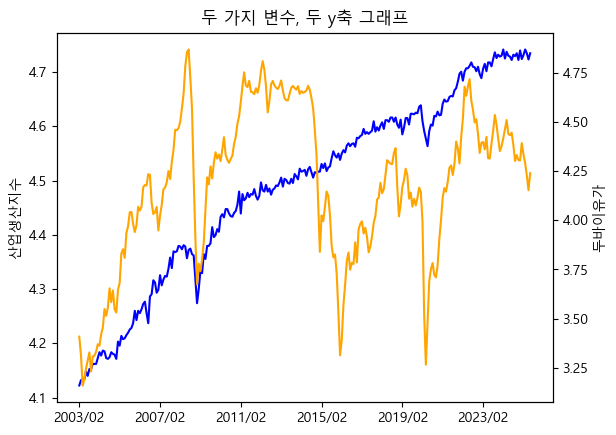

In [204]:
x = temp.index
y1 = np.log(temp['ipi'])
y2 = np.log(temp['dubai'])

fig, ax1 = plt.subplots()                # 첫 번째 y축
ax1.plot(x, y1, color='blue', label='y1')
ax1.set_ylabel('산업생산지수', color='black')

ax2 = ax1.twinx()                        # 두 번째 y축, x축은 공유
ax2.plot(x, y2, color='orange', label='y2')
ax2.set_ylabel('두바이유가', color='black')
plt.xticks(x[::48])
plt.title('두 가지 변수, 두 y축 그래프')
plt.show()

In [ ]:
import statsmodels.api as sm
#raw data(변형 안하고 돌림)
reg1 = sm.OLS(temp['ipi'], temp['dubai'], missing='drop').fit()
print(reg1.summary())

                                 OLS Regression Results                                
Dep. Variable:                    ipi   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              2311.
Date:                Mon, 18 Aug 2025   Prob (F-statistic):                   8.63e-134
Time:                        15:53:04   Log-Likelihood:                         -1292.3
No. Observations:                 269   AIC:                                      2587.
Df Residuals:                     268   BIC:                                      2590.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [207]:
# 로그-로그
reg2 = sm.OLS(np.log(temp['ipi']), np.log(temp['dubai']), missing='drop').fit()
print(reg2.summary())

                                 OLS Regression Results                                
Dep. Variable:                    ipi   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          3.690e+04
Date:                Mon, 18 Aug 2025   Prob (F-statistic):                   4.53e-289
Time:                        15:54:06   Log-Likelihood:                         -122.48
No. Observations:                 269   AIC:                                      247.0
Df Residuals:                     268   BIC:                                      250.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [214]:
np.arange(0,13,3)

array([ 0,  3,  6,  9, 12])

In [229]:
#로그-로그로 두바이유 가격에 시차 1년까지 적용하면서 시행
for i in np.arange(0,13,3):
    x = sm.add_constant(np.log(temp['dubai']))
    y = np.log(temp['ipi'].shift(i))
    reg = sm.OLS(y, x, missing='drop').fit()
    yhat = reg.predict(x)
    rmse = np.sqrt(reg.mse_resid)
    print(f'lag: {i} \n r-square: {reg.rsquared} \n rmse: {rmse}')

lag: 0 
 r-square: 0.18381844535739955 
 rmse: 0.15568465254328076
lag: 3 
 r-square: 0.15276182632508128 
 rmse: 0.1577326528532875
lag: 6 
 r-square: 0.11791492680411941 
 rmse: 0.1599472038627695
lag: 9 
 r-square: 0.08341445640814582 
 rmse: 0.1619528482294133
lag: 12 
 r-square: 0.054899869729683415 
 rmse: 0.16333672734841218


In [230]:
#로그-로그로 두바이유 가격에 시차 3년까지 적용하면서 시행
#결과 데이터프레임으로
results_list = []
for i in np.arange(0,37,1):
    x = np.log(temp['dubai'])
    y = np.log(temp['ipi'].shift(i))
    reg = sm.OLS(y, x, missing='drop').fit()
    yhat = reg.predict(x)
    rmse = np.sqrt(reg.mse_resid)
    result_dict = {'lag': i, 'r-square': reg.rsquared, 'rmse': np.sqrt(reg.mse_resid)}
    results_list.append(result_dict)
    print(f'lag: {i} \n r-square: {reg.rsquared} \n rmse: {rmse}')
    results_df = pd.DataFrame(results_list)

lag: 0 
 r-square: 0.9927895366690189 
 rmse: 0.38221320969596534
lag: 1 
 r-square: 0.9928077604689851 
 rmse: 0.38165387299970266
lag: 2 
 r-square: 0.9928347841930815 
 rmse: 0.3808635689528943
lag: 3 
 r-square: 0.9928962453220074 
 rmse: 0.3791498673501949
lag: 4 
 r-square: 0.9929523682720156 
 rmse: 0.3775698147237845
lag: 5 
 r-square: 0.9929898980345777 
 rmse: 0.37648693262711835
lag: 6 
 r-square: 0.9930206395117535 
 rmse: 0.3755862339309913
lag: 7 
 r-square: 0.9930352689021128 
 rmse: 0.375112266050337
lag: 8 
 r-square: 0.9930715026493132 
 rmse: 0.37406063145448576
lag: 9 
 r-square: 0.993089021783346 
 rmse: 0.373508128483061
lag: 10 
 r-square: 0.9931093126038681 
 rmse: 0.3728814018936055
lag: 11 
 r-square: 0.9931294339882492 
 rmse: 0.37225716508308654
lag: 12 
 r-square: 0.9931479220389835 
 rmse: 0.37167934211406034
lag: 13 
 r-square: 0.9931807386421524 
 rmse: 0.3707090544044207
lag: 14 
 r-square: 0.9931919142529507 
 rmse: 0.3703248063721279
lag: 15 
 r-squar

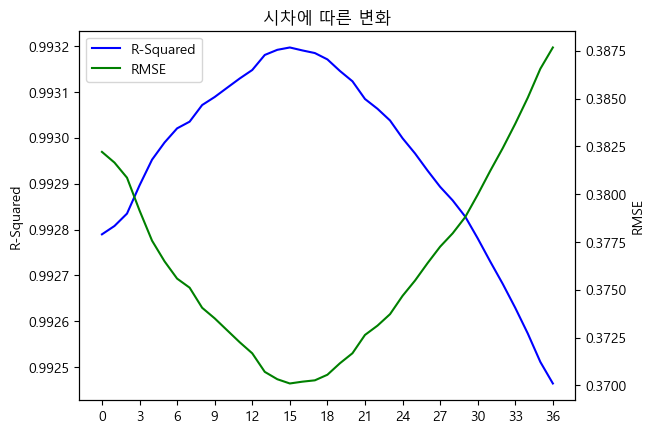

In [242]:
x = results_df['lag']
y1 = results_df['r-square']
y2 = results_df['rmse']


fig, ax1 = plt.subplots()                # 첫 번째 y축
ln1 = ax1.plot(x, y1, label='R-Squared', color='blue')
ax1.set_ylabel('R-Squared', color='black')
ax2 = ax1.twinx()                        # 두 번째 y축, x축은 공유
ln2 = ax2.plot(x, y2, label='RMSE', color='green')
ax2.set_ylabel('RMSE', color='black')

plt.xticks(x[::3])
plt.title('시차에 따른 변화')

# 첫 번째 축 (왼쪽 y축)


# 두 번째 축 (오른쪽 y축)


# 두 축의 plot 객체를 모두 합쳐서 legend 생성
lns = ln1 + ln2
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc='upper left')


plt.show()

In [5]:
oil_source = pd.read_csv(dir+'/data/한국석유공사_국내 원유수입_국가별_20241231.csv', encoding='cp949')

In [7]:
oil_source

,년,중국(물량),중국(금액),중국(단가),필리핀(물량),필리핀(금액),필리핀(단가),태국(물량),태국(금액),태국(단가),...,오만(단가),중립지대(물량),중립지대(금액),중립지대(단가),노르웨이(물량),노르웨이(금액),노르웨이(단가),영국(물량),영국(금액),영국(단가)
0,1980,266.0,8503.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5880.0,183088.0,31.00,NaN,NaN,NaN,NaN,NaN,NaN
1,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3047.0,108154.0,35.00,NaN,NaN,NaN,NaN,NaN,NaN
2,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1688.0,51973.0,31.00,NaN,NaN,NaN,NaN,NaN,NaN
3,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.00,1874.0,51492.0,27.00,NaN,NaN,NaN,NaN,NaN,NaN
4,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.00,1374.0,38411.0,28.00,NaN,NaN,NaN,NaN,NaN,NaN
5,1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.00,4065.0,108217.0,27.00,NaN,NaN,NaN,NaN,NaN,NaN
6,1986,NaN,NaN,NaN,NaN,NaN,NaN,440.0,6539.0,15.00,...,16.00,3689.0,49391.0,13.00,NaN,NaN,NaN,NaN,NaN,NaN
7,1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.00,3280.0,50452.0,15.00,NaN,NaN,NaN,NaN,NaN,NaN
8,1988,3444.0,41065.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1989,8099.0,119583.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,...,17.00,14526.0,231274.0,16.00,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
oil_source.fillna(0, inplace=True)

In [16]:
drops = [col for col in oil_source.columns if col.endswith('(물량)')]
oil_source.drop(columns=drops, inplace=True)

In [17]:
oil_source

,년,중국(금액),중국(단가),필리핀(금액),필리핀(단가),태국(금액),태국(단가),말레이시아(금액),말레이시아(단가),인도네시아(금액),...,예멘(금액),예멘(단가),오만(금액),오만(단가),중립지대(금액),중립지대(단가),노르웨이(금액),노르웨이(단가),영국(금액),영국(단가)
0,1980,8503.0,32.0,0.0,0.00,0.0,0.00,15928,40.00,0.0,...,0.0,0.0,0.0,0.00,183088.0,31.00,0.0,0.00,0.0,0.00
1,1981,0.0,0.0,0.0,0.00,0.0,0.00,91311,40.00,92342.0,...,0.0,0.0,0.0,0.00,108154.0,35.00,0.0,0.00,0.0,0.00
2,1982,0.0,0.0,0.0,0.00,0.0,0.00,72541,35.00,520649.0,...,0.0,0.0,0.0,0.00,51973.0,31.00,0.0,0.00,0.0,0.00
3,1983,0.0,0.0,0.0,0.00,0.0,0.00,281496,30.00,272184.0,...,0.0,0.0,548451.0,31.00,51492.0,27.00,0.0,0.00,0.0,0.00
4,1984,0.0,0.0,0.0,0.00,0.0,0.00,447473,29.00,495519.0,...,0.0,0.0,718569.0,30.00,38411.0,28.00,0.0,0.00,0.0,0.00
5,1985,0.0,0.0,0.0,0.00,0.0,0.00,548281,28.00,545668.0,...,0.0,0.0,661222.0,29.00,108217.0,27.00,0.0,0.00,0.0,0.00
6,1986,0.0,0.0,0.0,0.00,6539.0,15.00,343580,15.00,256526.0,...,0.0,0.0,414044.0,16.00,49391.0,13.00,0.0,0.00,0.0,0.00
7,1987,0.0,0.0,0.0,0.00,0.0,0.00,376879,18.00,321174.0,...,0.0,0.0,514859.0,18.00,50452.0,15.00,0.0,0.00,0.0,0.00
8,1988,41065.0,12.0,0.0,0.00,0.0,0.00,351745,16.00,198719.0,...,139551.0,16.0,749661.0,15.00,0.0,0.00,0.0,0.00,0.0,0.00
9,1989,119583.0,15.0,0.0,0.00,0.0,0.00,502794,18.00,216583.0,...,80002.0,18.0,1107824.0,17.00,231274.0,16.00,0.0,0.00,0.0,0.00


In [18]:
oil_source = oil_source.set_index('년')

In [ ]:
 def find_top_5_sources(row):
    # 1. Select only the numeric data in the row to perform calculations
    # 2. Get the 5 largest values from the numeric data
    top_5 = row.nlargest(5)
    total = row.sum()
    # 3. Return a list of (column_name, value) tuples
    return list(zip(top_5.index,top_5.values, top_5.values/total))

In [86]:
t5 = oil_source.iloc[0].nlargest(5).sum()
total = oil_source.iloc[0].sum()
others = total-t5
pct = others/total
pct

np.float64(0.008540547305658135)

In [102]:
def get_others(row):
    top_5 = row.nlargest(5).sum()
    total = row.sum()
    others = total-top_5
    return ('others', others, others/total)

In [72]:
top_5_results = oil_source.apply(find_top_5_sources, axis=1)

In [103]:
others = oil_source.apply(get_others, axis=1)

In [104]:
others

년
1980              (others, 44083.0, 0.008540547305658135)
1981              (others, 475015.0, 0.07797963925623891)
1982              (others, 722240.0, 0.12348691174491773)
1983             (others, 1647332.0, 0.28557654119144454)
1984               (others, 1984697.0, 0.342609306896544)
1985              (others, 2202620.0, 0.4004698833055247)
1986              (others, 1401817.0, 0.4180116152025802)
1987              (others, 1353234.0, 0.3572573399992238)
1988             (others, 1354880.0, 0.35392145748099496)
1989             (others, 1622408.0, 0.33369608343019125)
1990              (others, 1895372.0, 0.2933054827765982)
1991             (others, 1648854.0, 0.21933853930478292)
1992              (others, 2459291.0, 0.2604189676091539)
1993              (others, 2631757.0, 0.2830257993447864)
1994             (others, 2875838.0, 0.32241088132996826)
1995               (others, 3030836.0, 0.279987229452666)
1996             (others, 4188322.0, 0.28850412536758546)
1997        

In [44]:
top_5_results

년
1980    [(사우디아라비아(금액), 2935219.0, 0.5686631291419949),...
1981    [(사우디아라비아(금액), 3362304.0, 0.55196415479471), (...
1982    [(사우디아라비아(금액), 2845797.0, 0.48656773784746293)...
1983    [(사우디아라비아(금액), 1771699.0, 0.30713643178930605)...
1984    [(이란(금액), 1089370.0, 0.18805303814833604), (사우...
1985    [(이란(금액), 923542.0, 0.16791401011874535), (오만(...
1986    [(이란(금액), 512795.0, 0.15291173257123228), (오만(...
1987    [(사우디아라비아(금액), 547187.0, 0.14445880912107978),...
1988    [(오만(금액), 749661.0, 0.1958262825760659), (아랍에미...
1989    [(오만(금액), 1107824.0, 0.22785669814865817), (아랍...
1990    [(오만(금액), 1352747.0, 0.209335218579569), (아랍에미...
1991    [(사우디아라비아(금액), 2441024.0, 0.3247168266977661),...
1992    [(사우디아라비아(금액), 2754762.0, 0.2917069497058006),...
1993    [(사우디아라비아(금액), 2707529.0, 0.2911745117327284),...
1994    [(사우디아라비아(금액), 2685629.0, 0.301086505156174), ...
1995    [(사우디아라비아(금액), 3939872.0, 0.3639635551637021),...
1996    [(사우디아라비아(금액), 5060638.0, 0.34859185611611687)...
1997    [(사우

In [ ]:
top_5_df = pd.DataFrame(top_5_results.tolist(),
                        index=oil_source.index,
                        columns=[f'Rank_{i+1}' for i in range(5)])
print(top_5_df)

                                              Rank_1  \
년                                                      
1980    (사우디아라비아(금액), 2935219.0, 0.5686631291419949)   
1981      (사우디아라비아(금액), 3362304.0, 0.55196415479471)   
1982   (사우디아라비아(금액), 2845797.0, 0.48656773784746293)   
1983   (사우디아라비아(금액), 1771699.0, 0.30713643178930605)   
1984        (이란(금액), 1089370.0, 0.18805303814833604)   
1985         (이란(금액), 923542.0, 0.16791401011874535)   
1986         (이란(금액), 512795.0, 0.15291173257123228)   
1987    (사우디아라비아(금액), 547187.0, 0.14445880912107978)   
1988          (오만(금액), 749661.0, 0.1958262825760659)   
1989        (오만(금액), 1107824.0, 0.22785669814865817)   
1990          (오만(금액), 1352747.0, 0.209335218579569)   
1991    (사우디아라비아(금액), 2441024.0, 0.3247168266977661)   
1992    (사우디아라비아(금액), 2754762.0, 0.2917069497058006)   
1993    (사우디아라비아(금액), 2707529.0, 0.2911745117327284)   
1994     (사우디아라비아(금액), 2685629.0, 0.301086505156174)   
1995    (사우디아라비아(금액), 3939872.0, 0.3639635551637

In [105]:
top_5_df['others'] = others

In [106]:
top_5_df

,Rank_1,Rank_2,Rank_3,Rank_4,Rank_5,others
년,,,,,,
1980,"(사우디아라비아(금액), 2935219.0, 0.5686631291419949)","(쿠웨이트(금액), 1420341.0, 0.2751738652239135)","(이란(금액), 556705.0, 0.10785485079954657)","(중립지대(금액), 183088.0, 0.03547108239226769)","(에콰도르(금액), 22177.0, 0.004296525136619115)","(others, 44083.0, 0.008540547305658135)"
1981,"(사우디아라비아(금액), 3362304.0, 0.55196415479471)","(쿠웨이트(금액), 1333636.0, 0.21893298986165372)","(이란(금액), 546484.0, 0.08971216736167588)","(에콰도르(금액), 215458.0, 0.03537011908017794)","(아랍에미레이트(금액), 158629.0, 0.02604092964554366)","(others, 475015.0, 0.07797963925623891)"
1982,"(사우디아라비아(금액), 2845797.0, 0.48656773784746293)","(쿠웨이트(금액), 728471.0, 0.12455227360120177)","(이란(금액), 706059.0, 0.12072032208089398)","(인도네시아(금액), 520649.0, 0.08901935244943464)","(에콰도르(금액), 325501.0, 0.05565340227608893)","(others, 722240.0, 0.12348691174491773)"
1983,"(사우디아라비아(금액), 1771699.0, 0.30713643178930605)","(이란(금액), 903519.0, 0.15663134748839505)","(쿠웨이트(금액), 605500.0, 0.10496766631827688)","(오만(금액), 548451.0, 0.09507782255974445)","(리비아(금액), 291942.0, 0.05061019065283301)","(others, 1647332.0, 0.28557654119144454)"
1984,"(이란(금액), 1089370.0, 0.18805303814833604)","(사우디아라비아(금액), 1050990.0, 0.18142767155651404)","(오만(금액), 718569.0, 0.1240433310713639)","(인도네시아(금액), 495519.0, 0.08553921386693716)","(쿠웨이트(금액), 453742.0, 0.07832743846030485)","(others, 1984697.0, 0.342609306896544)"
1985,"(이란(금액), 923542.0, 0.16791401011874535)","(오만(금액), 661222.0, 0.12022023643617404)","(에콰도르(금액), 612363.0, 0.11133692563883966)","(아랍에미레이트(금액), 552061.0, 0.10037310305342331)","(말레이시아(금액), 548281.0, 0.09968584144729295)","(others, 2202620.0, 0.4004698833055247)"
1986,"(이란(금액), 512795.0, 0.15291173257123228)","(오만(금액), 414044.0, 0.12346490391037997)","(아랍에미레이트(금액), 387813.0, 0.11564301083990153)","(말레이시아(금액), 343580.0, 0.1024530525391706)","(에콰도르(금액), 293487.0, 0.08751568493673544)","(others, 1401817.0, 0.4180116152025802)"
1987,"(사우디아라비아(금액), 547187.0, 0.14445880912107978)","(이란(금액), 538852.0, 0.14225834716927135)","(오만(금액), 514859.0, 0.13592413197914063)","(아랍에미레이트(금액), 456830.0, 0.12060432314872774)","(말레이시아(금액), 376879.0, 0.09949704858255666)","(others, 1353234.0, 0.3572573399992238)"
1988,"(오만(금액), 749661.0, 0.1958262825760659)","(아랍에미레이트(금액), 586490.0, 0.15320278961828998)","(이란(금액), 511660.0, 0.13365571337293775)","(말레이시아(금액), 351745.0, 0.09188275202353904)","(에콰도르(금액), 273758.0, 0.0715110049281724)","(others, 1354880.0, 0.35392145748099496)"


In [114]:
top_5_df.loc[2020]['Rank_1'][0].replace('(금액)', '')

'사우디아라비아'

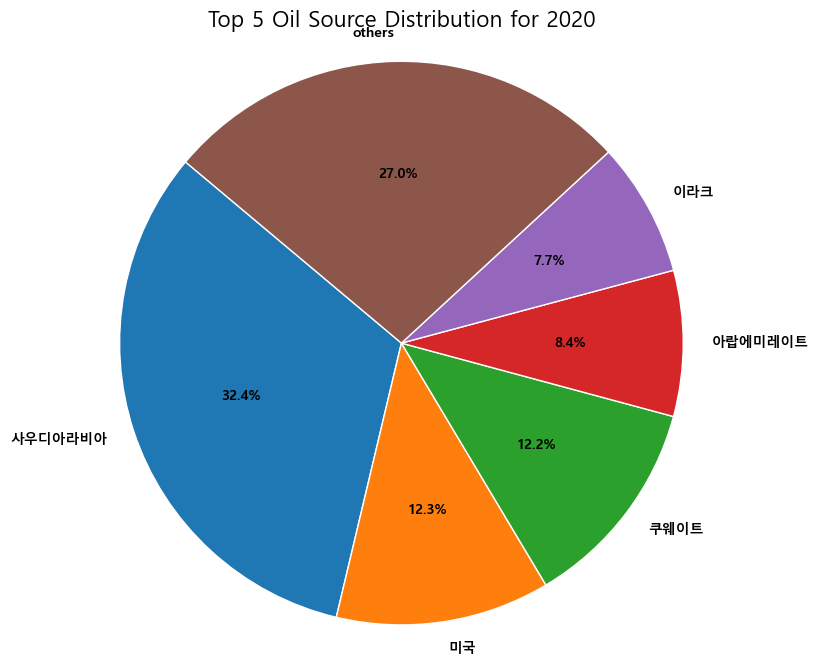

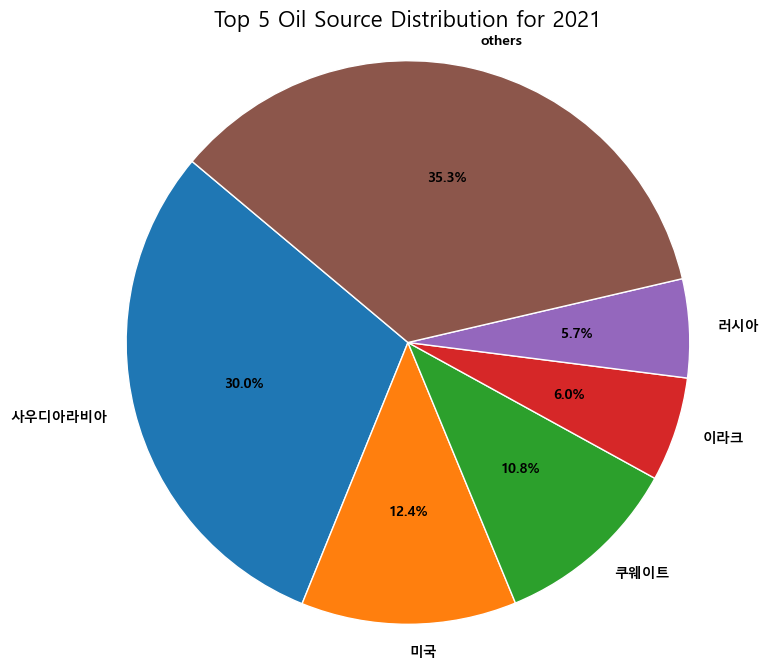

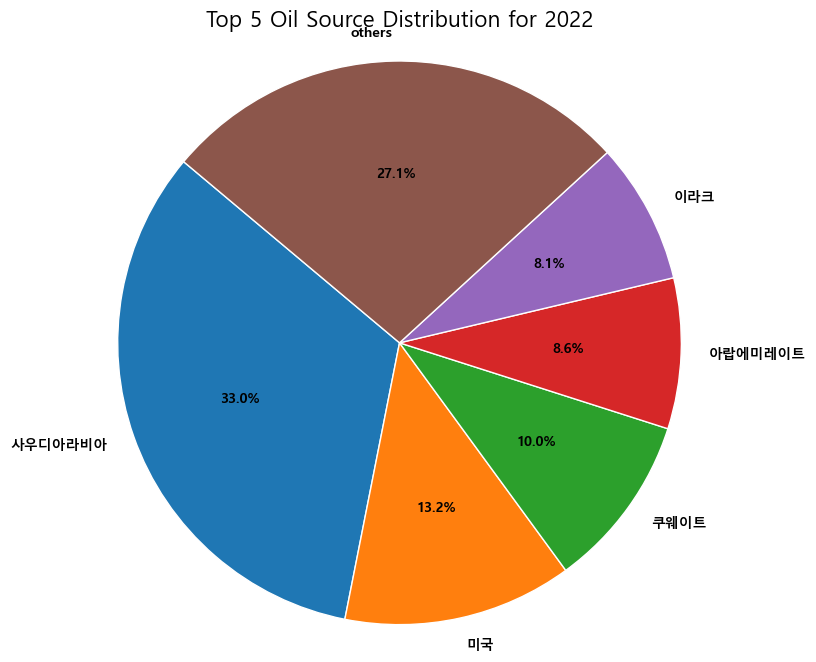

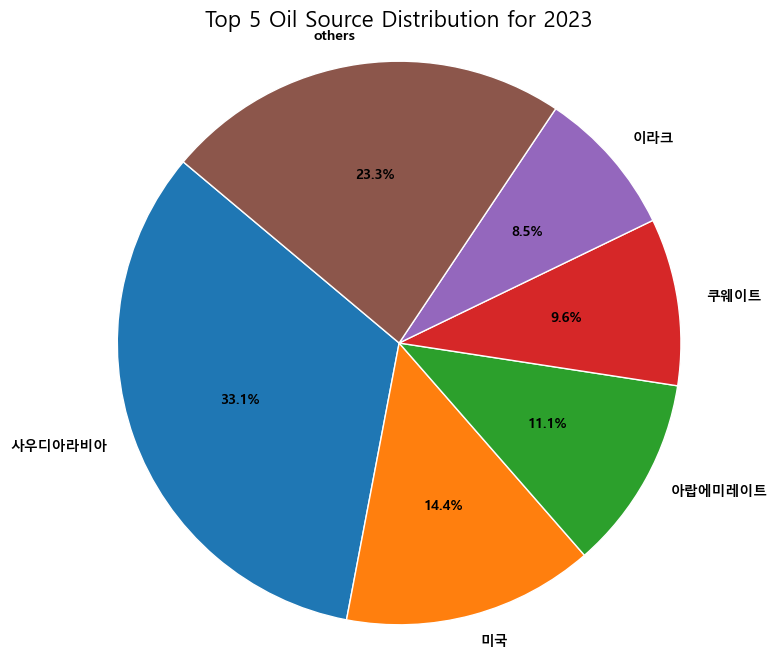

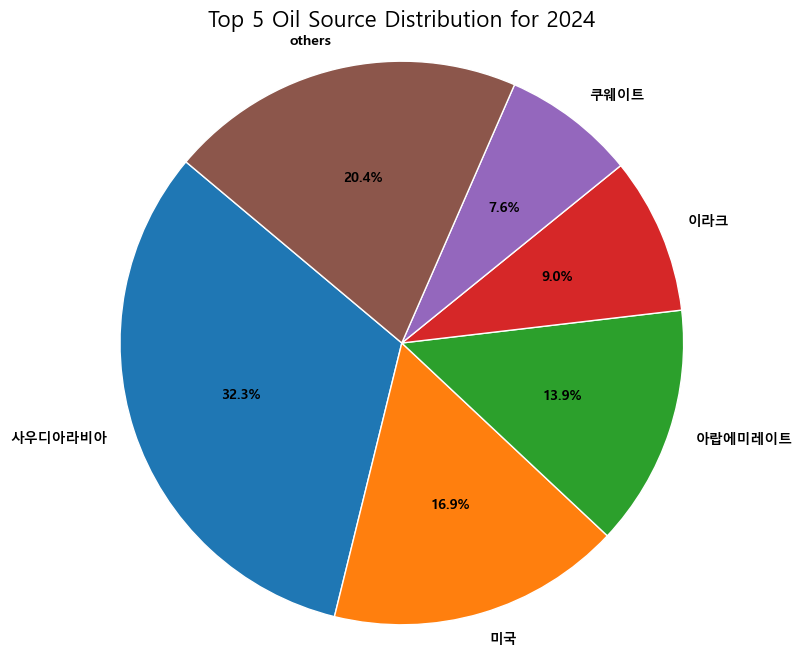

In [123]:
years_to_plot = range(2020, 2025)
plt.rcParams['font.family'] = 'Malgun Gothic'
for year in years_to_plot:
    if year in top_5_df.index:
        year_data = top_5_df.loc[year]
        sources = [item[0].replace('(금액)', '') for item in year_data]
        values = [item[2] for item in year_data]
        labels_inside = [f'{s}\n({v:.1f}%)' for s, v in zip(sources, values)]
        plt.figure(figsize=(8, 8))
        plt.pie(values, labels=sources,autopct='%1.1f%%',
                 startangle=140,
                 wedgeprops={'edgecolor':'white', 'linewidth': 1},
                 textprops={'color':'black', 'weight':'bold'})
        plt.title(f'Top 5 Oil Source Distribution for {year}', fontsize=16)
        plt.axis('equal')
        plt.show()


In [60]:
sources

['사우디아라비아(금액)', '미국(금액)', '아랍에미레이트(금액)', '이라크(금액)', '쿠웨이트(금액)']

In [61]:
values

[np.float64(0.3226840826068179),
 np.float64(0.16851440924346048),
 np.float64(0.13854122064372337),
 np.float64(0.08977751305057032),
 np.float64(0.07610777693157343)]

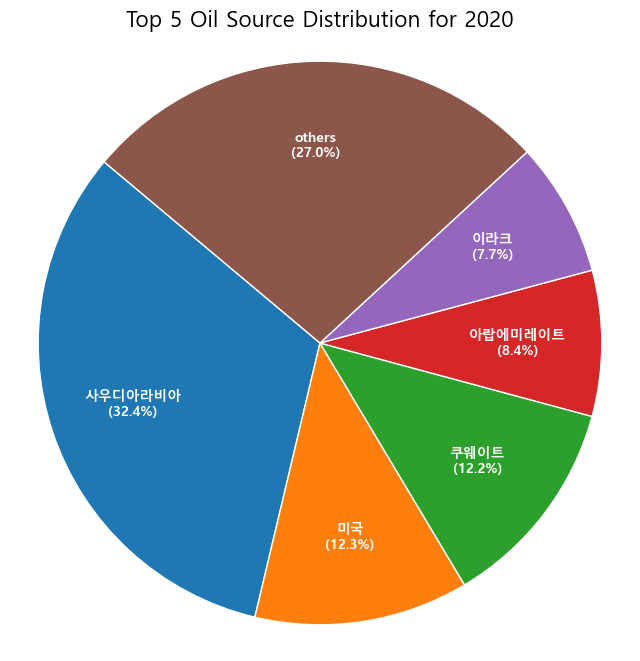

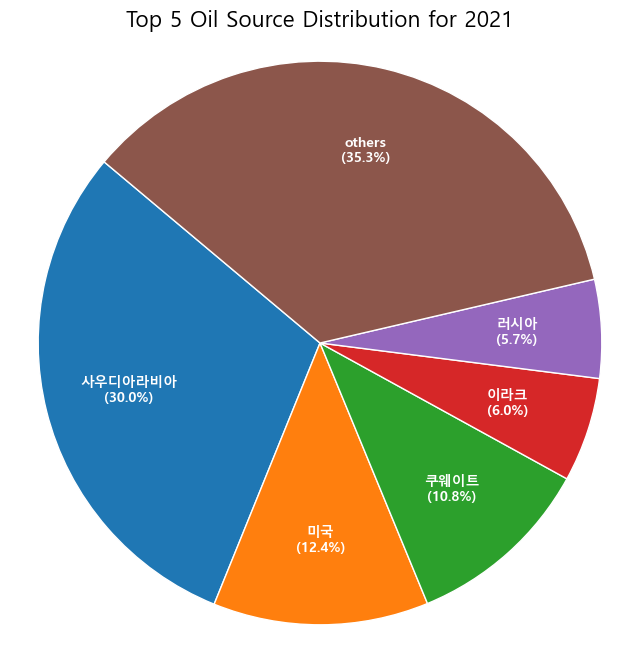

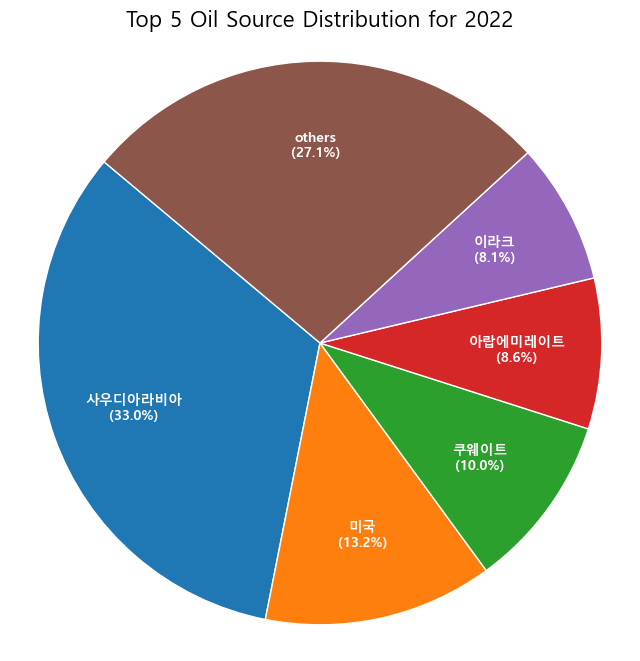

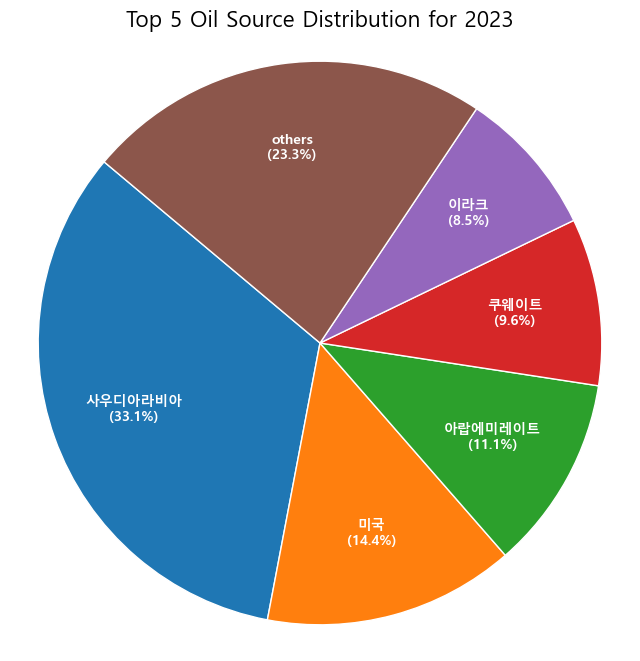

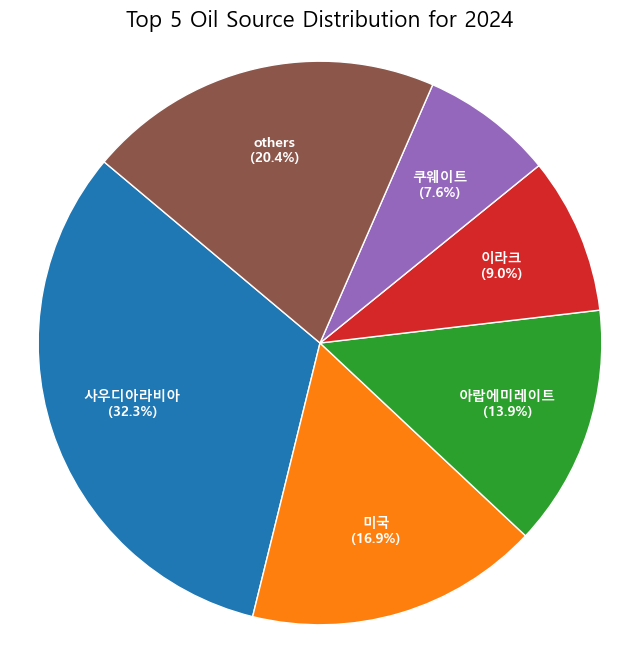

In [126]:
years_to_plot = range(2020, 2025)
plt.rcParams['font.family'] = 'Malgun Gothic'
for year in years_to_plot:
    if year in top_5_df.index:
        year_data = top_5_df.loc[year]
        sources = [item[0].replace('(금액)','') for item in year_data]
        values = [item[2] * 100 for item in year_data]
        fig, ax = plt.subplots(figsize=(8, 8))
        wedges, _ = ax.pie(values, startangle=140,
                           wedgeprops={'edgecolor':'white', 'linewidth': 1})
        labels_to_place = [f'{s}\n({v:.1f}%)' for s, v in zip(sources, values)]
        for i, w in enumerate(wedges):
            angle = (w.theta2 - w.theta1) / 2. + w.theta1
            x = 0.7 * np.cos(np.deg2rad(angle))
            y = 0.7 * np.sin(np.deg2rad(angle))
            ax.text(x, y, labels_to_place[i],
                    ha="center", # Horizontal alignment
                    va="center", # Vertical alignment
                    color="white",
                    weight="bold")
        ax.set_title(f'Top 5 Oil Source Distribution for {year}', fontsize=16)
        ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()
